In [1]:
import json
import matplotlib.pyplot as plt
import math
import os
import numpy as np

# Load Datasets for graphs

In [2]:
name = "LossesData/v4_loss.json"
with open(name, "r") as f:
    all_problems_loss_history = json.load(f)

name = "LossesData/v4_eval.json"
with open(name, "r") as f:
    all_problems_eval_history = json.load(f)



# Make graphs and relevant data

In [3]:
data_1 = [min(v) if v[-1] <0 else 0 for k,v in all_problems_loss_history.items()]
data_2 = [min(v) if v[-1] <0 else 0 for k,v in all_problems_eval_history.items()]


minimum_2 = [(idx,v) for idx,v in enumerate(data_2)]

minimum_2.sort(key=lambda x:x[1], reverse=True)
solve_rate = 100*sum([1 for i in range(len(data_2)) if data_2[i] <= -7])/len(data_2)
print(minimum_2[1])
print(solve_rate)

ZeroDivisionError: division by zero

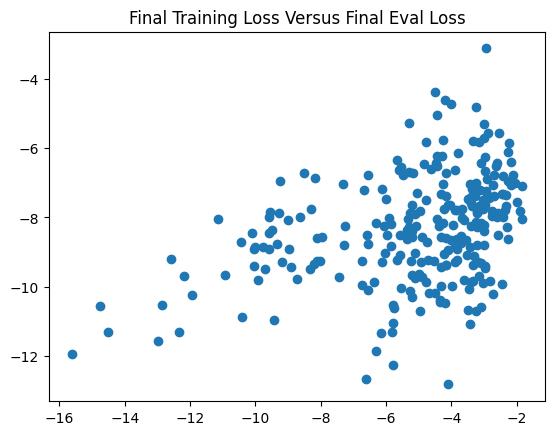

[[1.         0.38170241]
 [0.38170241 1.        ]]


In [4]:
plt.title("Final Training Loss Versus Final Eval Loss")
plt.scatter(data_2,data_1)
plt.show()
corre_coef = np.corrcoef(data_1, data_2)
print(corre_coef)

<BarContainer object of 262 artists>

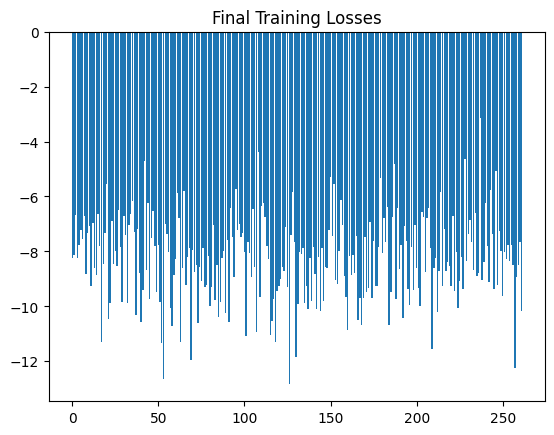

In [5]:
plt.title("Final Training Losses")
plt.bar([i for i in range(len(data_1))],data_1)

<BarContainer object of 262 artists>

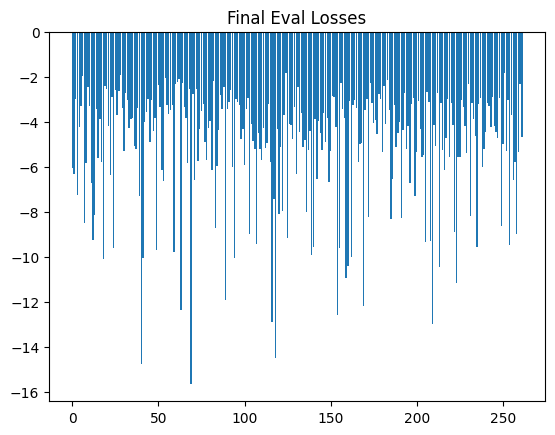

In [6]:
plt.title("Final Eval Losses")
plt.bar([i for i in range(len(data_2))],data_2)

(array([ 2.,  2.,  2.,  7., 11., 14., 22., 29., 37., 31., 30., 27., 20.,
        12.,  8.,  2.,  4.,  1.,  0.,  1.]),
 array([-12.81547451, -12.3311426 , -11.8468107 , -11.36247879,
        -10.87814689, -10.39381498,  -9.90948308,  -9.42515117,
         -8.94081926,  -8.45648736,  -7.97215545,  -7.48782355,
         -7.00349164,  -6.51915973,  -6.03482783,  -5.55049592,
         -5.06616402,  -4.58183211,  -4.09750021,  -3.6131683 ,
         -3.12883639]),
 <BarContainer object of 20 artists>)

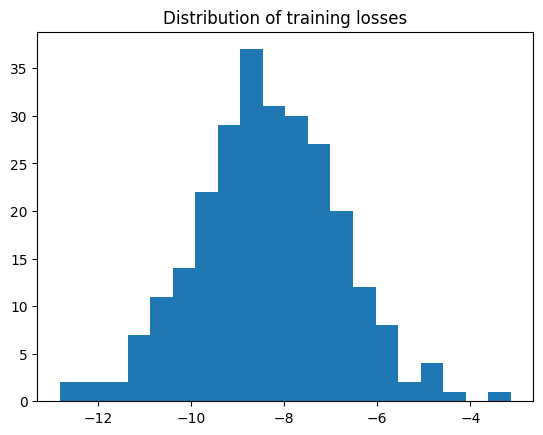

In [7]:
plt.title("Distribution of training losses")
plt.hist(data_1, bins=20)

(array([ 1.,  2.,  0.,  2.,  3.,  1.,  2.,  2., 13.,  7.,  9.,  3.,  6.,
        15., 23., 29., 37., 44., 42., 21.]),
 array([-15.62804031, -14.93798627, -14.24793223, -13.55787819,
        -12.86782415, -12.17777011, -11.48771607, -10.79766203,
        -10.10760798,  -9.41755394,  -8.7274999 ,  -8.03744586,
         -7.34739182,  -6.65733778,  -5.96728374,  -5.2772297 ,
         -4.58717566,  -3.89712161,  -3.20706757,  -2.51701353,
         -1.82695949]),
 <BarContainer object of 20 artists>)

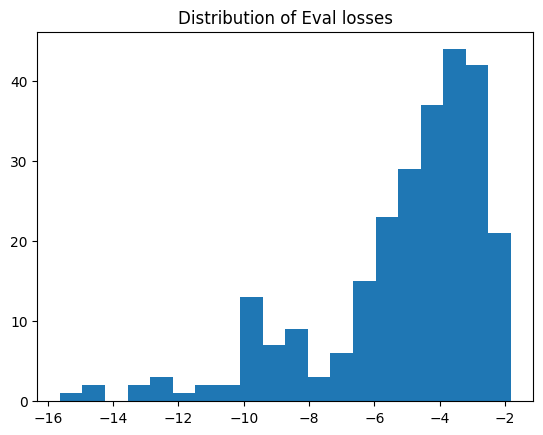

In [8]:
plt.title("Distribution of Eval losses")
plt.hist(data_2, bins=20)

In [9]:
data_3 = [min(v) for k,v in all_problems_loss_history.items()]
data_4 = [min(v) for k,v in all_problems_eval_history.items()]
print(data_3[7])

-6.713679313659668


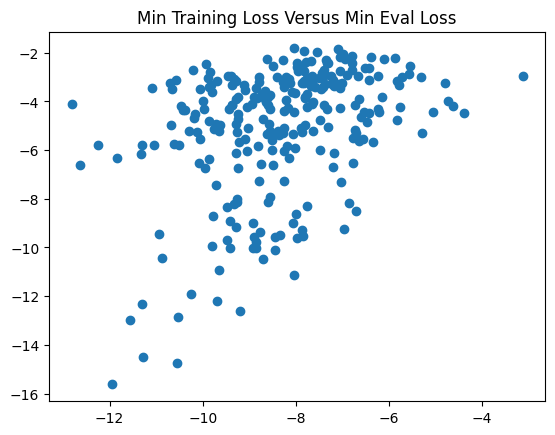

[[1.         0.38170241]
 [0.38170241 1.        ]]


In [10]:
plt.title("Min Training Loss Versus Min Eval Loss")
plt.scatter(data_3,data_4)
plt.show()
corre_coef = np.corrcoef(data_3, data_4)
print(corre_coef)

<BarContainer object of 262 artists>

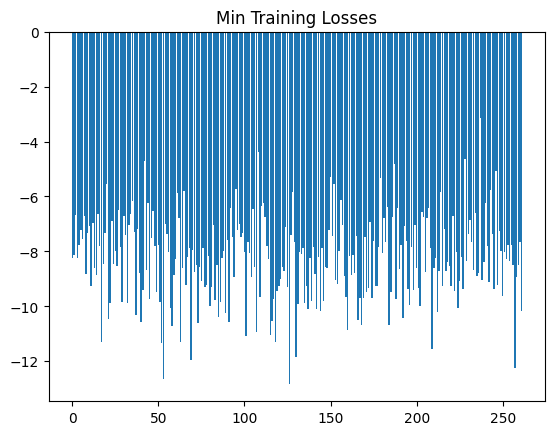

In [11]:
plt.title("Min Training Losses")
plt.bar([i for i in range(len(data_3))],data_3)

<BarContainer object of 262 artists>

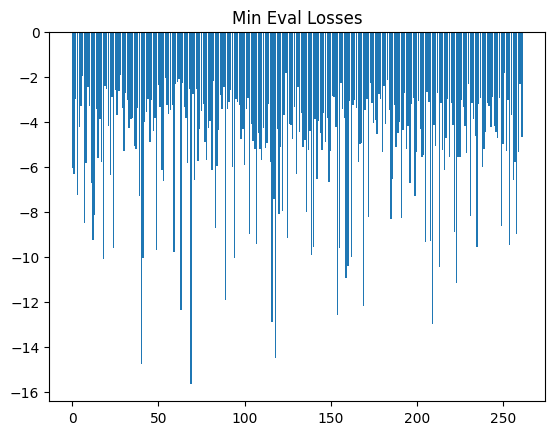

In [12]:
plt.title("Min Eval Losses")
plt.bar([i for i in range(len(data_4))],data_4)

(array([ 2.,  2.,  2.,  7., 11., 14., 22., 29., 37., 31., 30., 27., 20.,
        12.,  8.,  2.,  4.,  1.,  0.,  1.]),
 array([-12.81547451, -12.3311426 , -11.8468107 , -11.36247879,
        -10.87814689, -10.39381498,  -9.90948308,  -9.42515117,
         -8.94081926,  -8.45648736,  -7.97215545,  -7.48782355,
         -7.00349164,  -6.51915973,  -6.03482783,  -5.55049592,
         -5.06616402,  -4.58183211,  -4.09750021,  -3.6131683 ,
         -3.12883639]),
 <BarContainer object of 20 artists>)

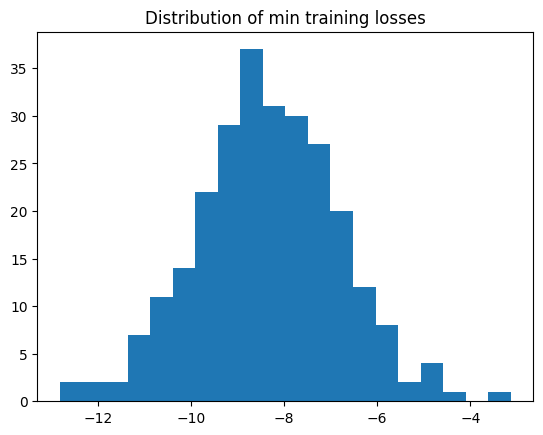

In [13]:
plt.title("Distribution of min training losses")
plt.hist(data_3, bins=20)

(array([ 1.,  2.,  0.,  2.,  3.,  1.,  2.,  2., 13.,  7.,  9.,  3.,  6.,
        15., 23., 29., 37., 44., 42., 21.]),
 array([-15.62804031, -14.93798627, -14.24793223, -13.55787819,
        -12.86782415, -12.17777011, -11.48771607, -10.79766203,
        -10.10760798,  -9.41755394,  -8.7274999 ,  -8.03744586,
         -7.34739182,  -6.65733778,  -5.96728374,  -5.2772297 ,
         -4.58717566,  -3.89712161,  -3.20706757,  -2.51701353,
         -1.82695949]),
 <BarContainer object of 20 artists>)

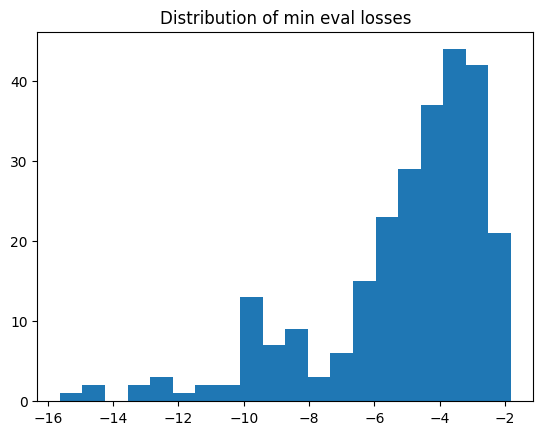

In [14]:
plt.title("Distribution of min eval losses")
plt.hist(data_4, bins=20)

# Load all datasets in folder

In [10]:
dirr = "LossesData"
sets = [os.path.join(dirr, file) for file in os.listdir(dirr)]
data_dict = {}
for s in sets:

    with open(s, "r") as f:
        history = json.load(f)
        data_dict[s] = history



# Functions for comparing data sets

In [38]:
def compare_data_sets(set1, set2):
    data_1 = [v[-1] if v[-1] < 0 else 0 for k,v in set1.items()]
    data_2 = [v[-1] if v[-1] < 0 else 0 for k,v in set2.items()]
    set_1 = set([i for i,v in enumerate(data_1) if v < -6])
    set_2 = set([i for i,v in enumerate(data_2) if v < -6])
    union = set_1.union(set_2)

    plt.figure(1)
    plt.bar([i for i in range(len(data_1))],data_1, color="b")
    plt.bar([i for i in range(len(data_2))],data_2, color="r", alpha=0.7)
    comp = [1 for i in range(len(data_1)) if data_1[i] < data_2[i]]
    plt.figure(2)
    range_low = min(min(data_1), min(data_2))
    range_high = max(max(data_1), max(data_2))
    plt.hist(data_1, bins=40, color="b", range=(range_low, range_high))
    plt.hist(data_2, bins=40, color="r", alpha=0.7, range=(range_low, range_high))
    perc_1 = [1 for i in range(len(data_1)) if data_1[i] < -6]
    perc_2 = [1 for i in range(len(data_2)) if data_2[i] < -6]
    print("First Average: ", sum(data_1) / len(data_1))
    print("Second Average: ", sum(data_2) / len(data_2))
    print(f"Firsat Data performs better in {sum(comp)} of {len(data_1)} of cases, \"{sum(comp) / len(data_1) * 100}%\" ")
    print(f"The solve rate for the first data set is {100*(sum(perc_1) / len(data_1))}%")
    print(f"The solve rate for the second data set is {100*(sum(perc_2) / len(data_2))}%")
    print(f"Combined solve rate is {len(union) / len(data_1) * 100}%")

    plt.show()
def get_total_solve(data_points):
    all_data = [[v[-1] if v[-1] < 0 else 0 for k,v in set1.items()] for set1 in data_points]
    all_sets = [set([i for i,v in enumerate(data_1) if (v < -7) ]) for data_1 in all_data]
    set_tot = all_sets[0]
    set_mean = sum(all_data[0])/len(all_data[0])
    print(all_sets[0])
    for i in range(1, len(all_sets)):
        set_tot = set_tot.union(all_sets[i])
        mean = sum(all_data[i])/len(all_data[i])
        print(all_sets[i])
        set_mean += mean

    set_mean = set_mean/len(all_data)
    print(f"Mean of all data sets is {set_mean}")
    print(f"The total solve for all data sets is {len(set_tot)/len(all_data[0])*100}%")





# Get solve rate and problems solved

In [39]:
get_total_solve([data_dict["LossesData/v1_eval.json"],  data_dict["LossesData/v3_eval.json"]])

{39, 136, 11, 235, 49, 53, 118, 120, 216}
{136, 11, 18, 116, 149, 150, 120, 59, 216}
Mean of all data sets is -3.9852176952453062
The total solve for all data sets is 5.343511450381679%


# Compare data sets

First Average:  -4.311801211069558
Second Average:  -4.426919098118789
Firsat Data performs better in 155 of 262 of cases, "59.16030534351145%" 
The solve rate for the first data set is 15.648854961832063%
The solve rate for the second data set is 19.84732824427481%
Combined solve rate is 22.519083969465647%


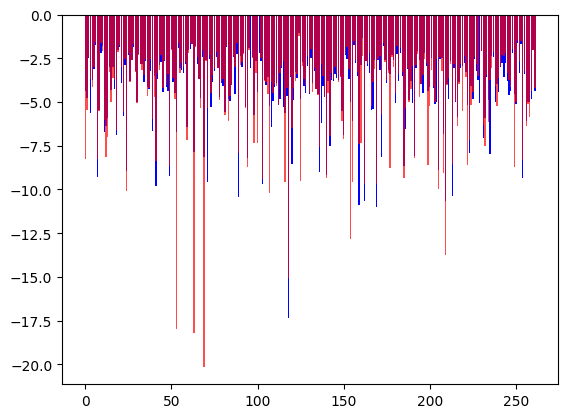

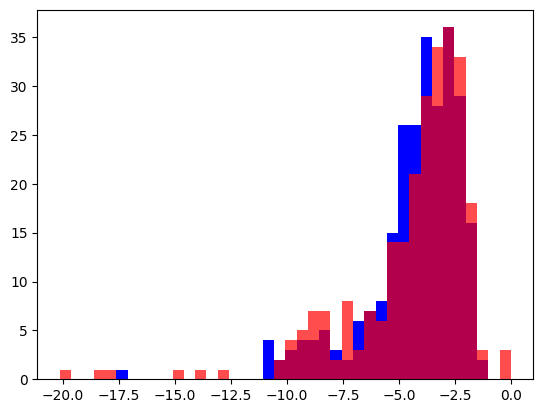

In [45]:
compare_data_sets(data_dict["LossesData/ca_eval.json"], data_dict["LossesData/v4_eval.json"])

First Average:  -4.311801211069558
Second Average:  -3.6337488493846575
Firsat Data performs better in 164 of 262 of cases, "62.59541984732825%" 
The solve rate for the first data set is 10.687022900763358%
The solve rate for the second data set is 6.488549618320611%
Combined solve rate is 13.740458015267176%


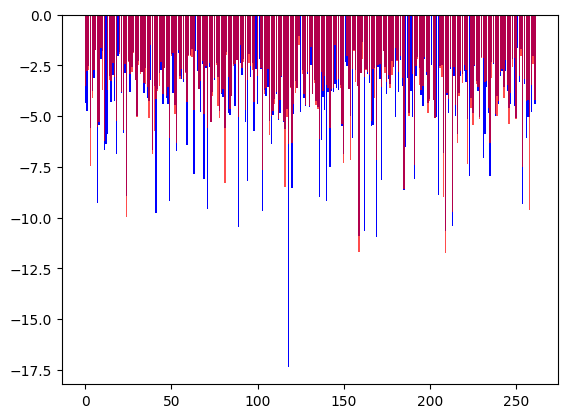

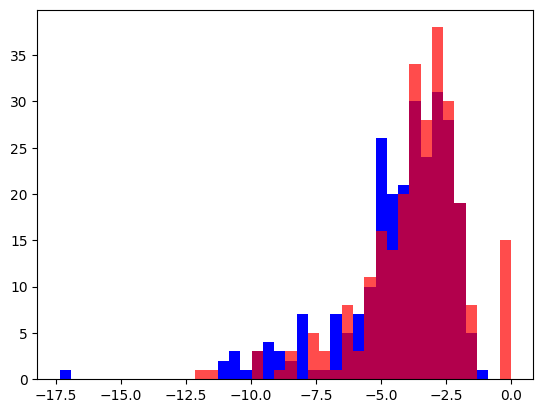

In [9]:
compare_data_sets(data_dict["LossesData/ca_eval.json"], data_dict["LossesData/v1_eval.json"])

First Average:  -4.311801211069558
Second Average:  -3.6337488493846575
Firsat Data performs better in 164 of 262 of cases, "62.59541984732825%" 
The solve rate for the first data set is 10.687022900763358%
The solve rate for the second data set is 6.488549618320611%
Combined solve rate is 13.740458015267176%


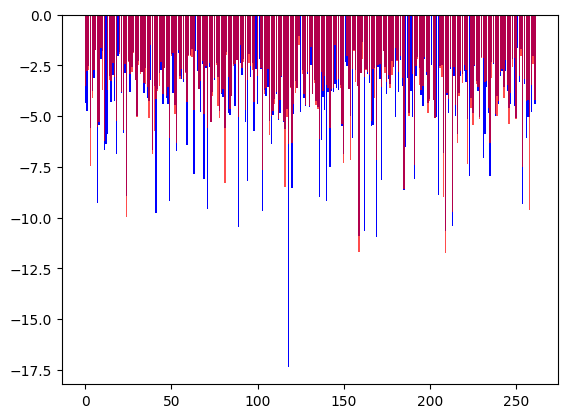

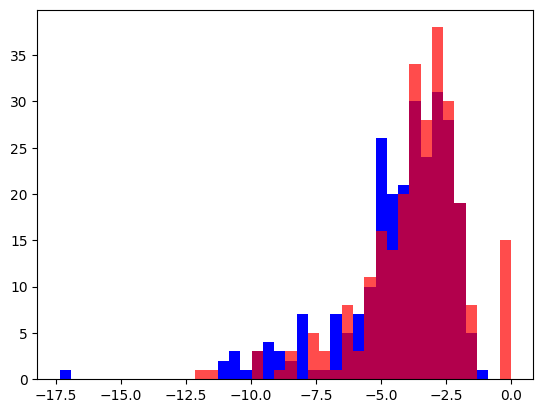

In [10]:
compare_data_sets(data_dict["LossesData/ca_eval.json"], data_dict["LossesData/v2_eval.json"])

First Average:  -4.395224210619927
Second Average:  -4.027403795719147
Firsat Data performs better in 27 of 40 of cases, "67.5%" 
The solve rate for the first data set is 12.5%
The solve rate for the second data set is 5.0%


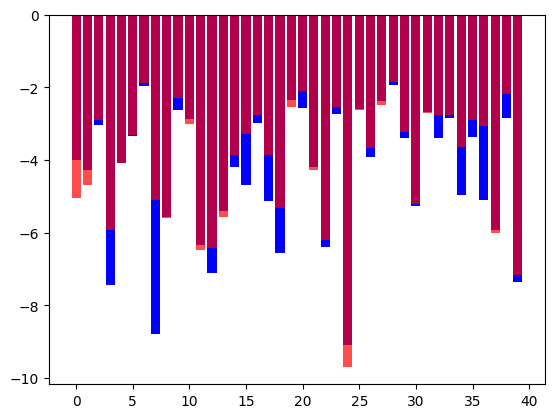

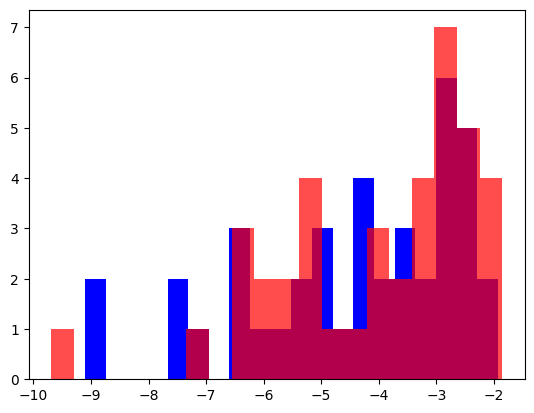

In [8]:
compare_data_sets(data_dict["LossesData/ca_eval.json"], data_dict["LossesData/v3_eval.json"])